# (How feature can affect the trip duration)
## by (Samar Osailan)

## Investigation Overview

> To start with, this investigation will go through the process to look up how some features can affect the duration of a trip. The main features are: user type, bikes type, start station and end station

## Dataset Overview

> The dataset contains 158168 trips data for Bay Wheels's Ford GoBike described as rows with 13 features described as columns which are: 1- Bike ID 2- Bike type 3- Start Time and Date 4- End Time and Date 5- Start Station Name 6- Start Station ID 7- End Station Name 8- End Station ID 9- Start Station Latitude 10- Start Station Longitude 11- End Station Latitude 12- End Station Longitude 13- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("202006-baywheels-tripdata.csv")

In [4]:
# change start and end time to a dateframe
df.started_at = pd.to_datetime(df.started_at)
df.ended_at = pd.to_datetime(df.ended_at)

In [5]:
# add a new column that will calculate the trip duration
df["trip_duration"] = df.ended_at - df.started_at
df.trip_duration = df.trip_duration.dt.seconds
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.40000,37.760000,-122.420000,casual,678
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.49000,37.780000,-122.460000,casual,1275
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.41095,37.790000,-122.440000,casual,878
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.41000,37.770000,-122.430000,casual,2129
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.42921,37.772894,-122.509079,casual,3004


## Trip duration distribution

> The distirbution is right skewed where the number of trips started to increase from  about 45000 to a peak of 50000 and then it starts to fall down under 10000 for more than 2000 seconds.

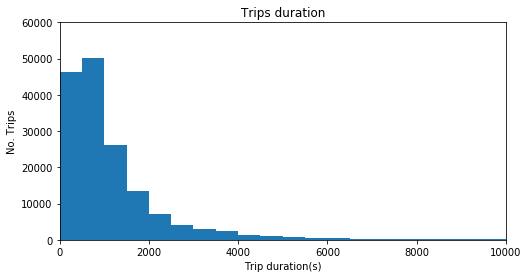

In [6]:
binsize = 500
bins = np.arange(0, df['trip_duration'].max()+binsize, binsize)

plt.figure(figsize=[8, 4])
plt.hist(data = df, x = 'trip_duration', bins = bins)
plt.title('Trips duration')
plt.xlabel('Trip duration(s)')
plt.ylabel('No. Trips')
plt.axis([0, 10000, 0, 60000])
plt.show()

## User Type distribution

> The distirbution shows that casual users got a higher percentage

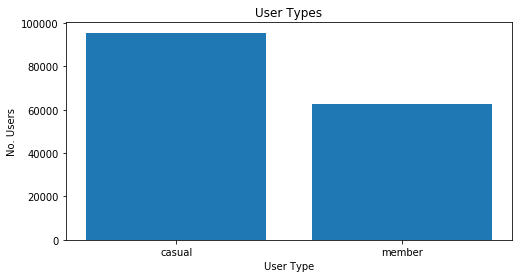

In [7]:
plt.figure(figsize=[8, 4])
plt.bar(x = df.member_casual.value_counts().keys(), height = df.member_casual.value_counts() )
plt.title('User Types')
plt.xlabel('User Type')
plt.ylabel('No. Users')
plt.show()

## Bike Type distribution

> The distirbution shows that electric bikes got a higher percentage

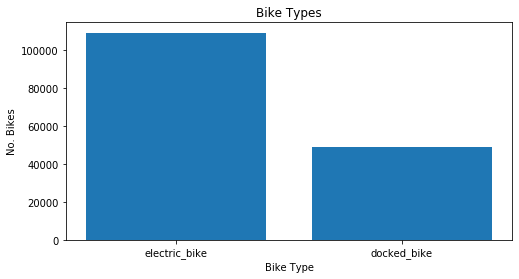

In [8]:
plt.figure(figsize=[8, 4])
plt.bar(x = df.rideable_type.value_counts().keys(), height = df.rideable_type.value_counts() )
plt.title('Bike Types')
plt.xlabel('Bike Type')
plt.ylabel('No. Bikes')
plt.show()

## The relationship between the trip duration and the user type

> The distirbution shows that member users mostly got a shorter trip duration while casual users vary from short to long trips.

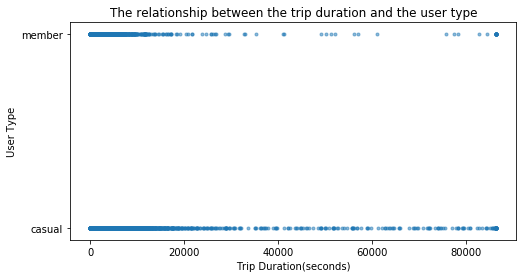

In [9]:
plt.figure(figsize=[8,4])
plt.scatter((df['trip_duration']), df['member_casual'], alpha = 0.5, marker = '.' )
plt.title('The relationship between the trip duration and the user type')
plt.xlabel('Trip Duration(seconds)')
plt.ylabel('User Type')
plt.show()

## The relationship between the trip duration and the bike type

> The distirbution shows that electric bike mostly got a shorter trip duration while docked bike vary from short to long trips.

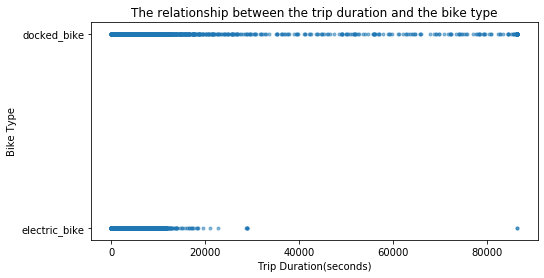

In [10]:
plt.figure(figsize=[8,4])
plt.scatter((df['trip_duration']), df['rideable_type'], alpha = 0.5, marker = '.' )
plt.title('The relationship between the trip duration and the bike type')
plt.xlabel('Trip Duration(seconds)')
plt.ylabel('Bike Type')
plt.show()

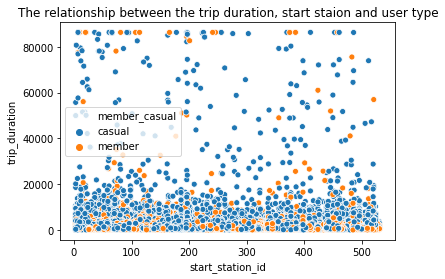

In [11]:
relation=sb.scatterplot(x='start_station_id',y='trip_duration',hue='member_casual',data=df)
plt.title('The relationship between the trip duration, start staion and user type')
plt.show()

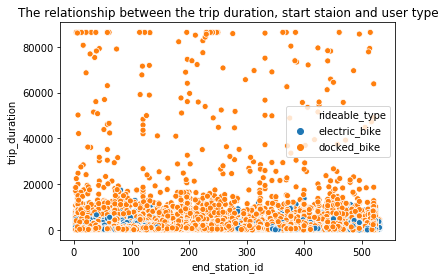

In [12]:
relation=sb.scatterplot(x='end_station_id',y='trip_duration',hue='rideable_type',data=df)
plt.title('The relationship between the trip duration, start staion and user type')
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!